In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [3]:
# Importing the Dataset
wine_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [4]:
wine_df.shape

(1599, 12)

In [5]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
# CHECKING ANY MISSING VALUES
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Checking DUPLICATES

duplicates = wine_df[wine_df.duplicated()]

In [9]:
duplicates # We can see there are alot of duplicate rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [10]:
# LETS go ahead and drop them because, the duplicate rows has no use
wine_df.drop_duplicates(inplace=True)

In [11]:
wine_df.shape

(1359, 12)

### DATA Analysis and Visualization

In [12]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [13]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
wine_df.describe().transpose()

# There are outliers present in total sulfur dioxide, free sulfur dioxide and residual sugar
# possibly in fixed acidity as well

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


## Visualizing

<AxesSubplot:xlabel='quality', ylabel='count'>

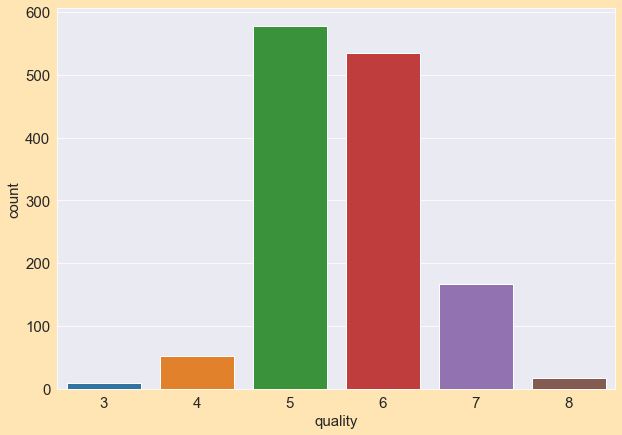

In [15]:
# CHECKING THE NUMBER OF WINE QUALITIES PRESENT IN THE DEPENDENT VARIABLE 
sns.countplot(wine_df['quality'])

# We can see,5 and 6 qualities are more than other qualities
# let's consider 3 and 4 represent low quality wine
# 5 and 6 represents Average Qulaity Wine
# And 7 and 8 represents High Quality Wine

In [16]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

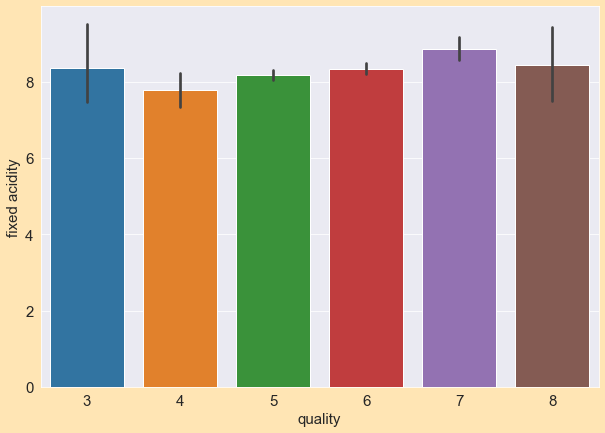

In [17]:
# Checking the relationship of each feature with target object
sns.barplot(x='quality',y='fixed acidity',data=wine_df)
# We can say that fixed acidity as the name suggests is equally important to every quality

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

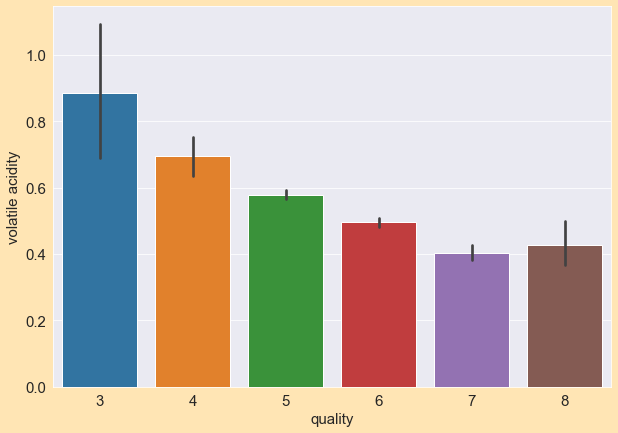

In [18]:
sns.barplot(x='quality',y='volatile acidity',data=wine_df)
# We can say Volatile acidity has is inversely proportional to the quality
# In order to get a high quality wine volatile acidity should be low in it.


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

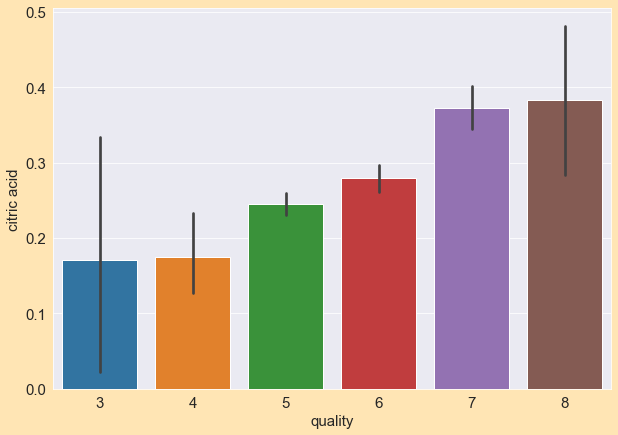

In [19]:
sns.barplot(x='quality',y='citric acid',data=wine_df)
# We can say that we have a monotonic relationship between quality and citric acid
# directly proportional to eavh other
# for a high quality wine, it needs to contain high citric acid

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

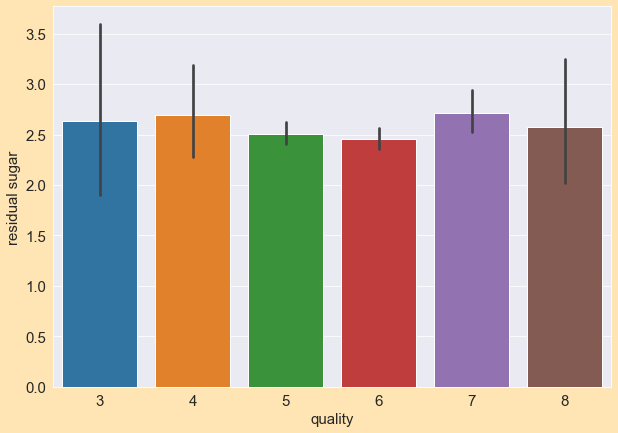

In [20]:
sns.barplot(x='quality',y='residual sugar',data=wine_df)
# We can see that high quality(7,8) and low quality(3,4) will have almost similar residual sugar 


<AxesSubplot:xlabel='quality', ylabel='chlorides'>

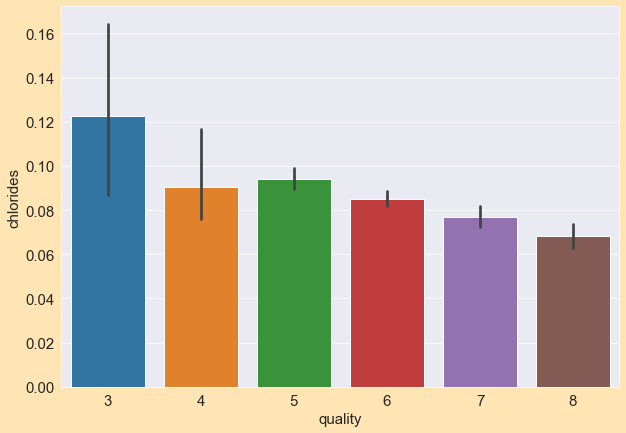

In [21]:
sns.barplot(x='quality',y='chlorides',data=wine_df)
# similar to volatile acidity, quality is inversely proportional to quality
# high chlorides gives a low quality wine and low chlorides gives a high quality one

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

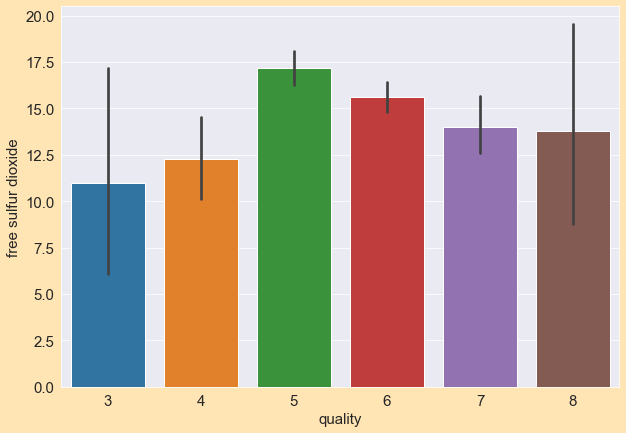

In [22]:
sns.barplot(x='quality',y='free sulfur dioxide',data=wine_df)
# We can observe free sulfur content is high in average quality wines, while high quality wines have balanced amount.

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

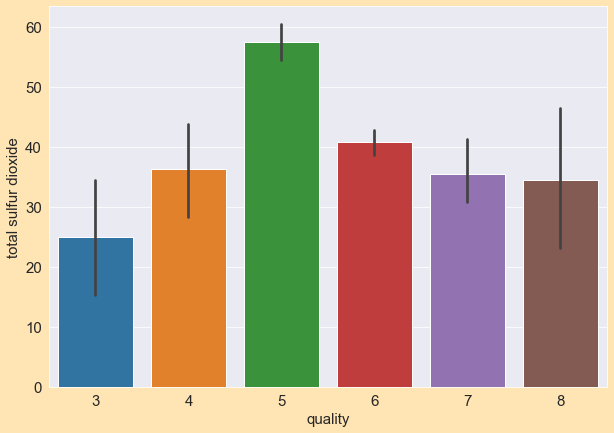

In [23]:
sns.barplot(x='quality',y='total sulfur dioxide',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

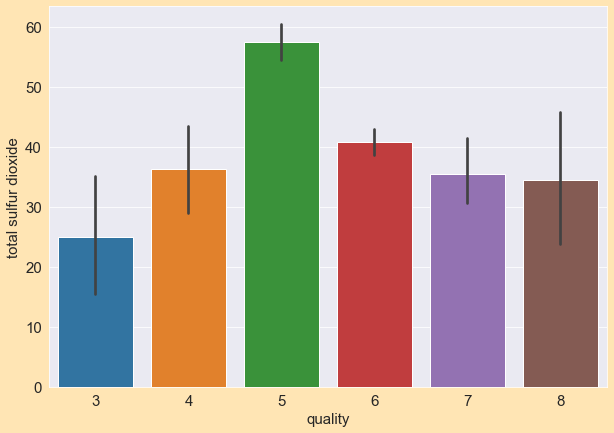

In [24]:
sns.barplot(x='quality',y='total sulfur dioxide',data=wine_df)
# similary to free sulfur dioxide, total sulfur dioxide is high in average quality wines

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

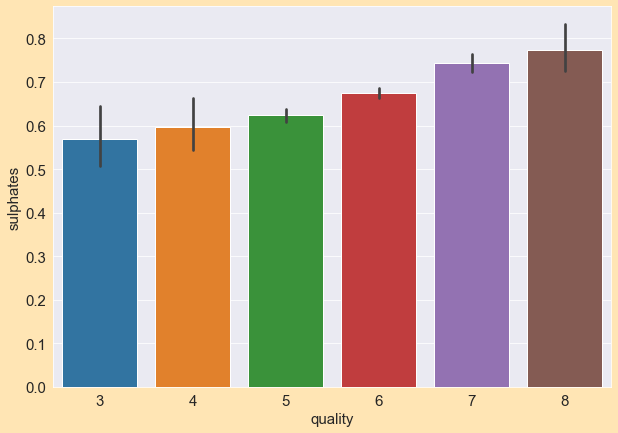

In [25]:
sns.barplot(x='quality',y='sulphates',data=wine_df)
# we can observe higher sulphates result in high quality of wine 

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

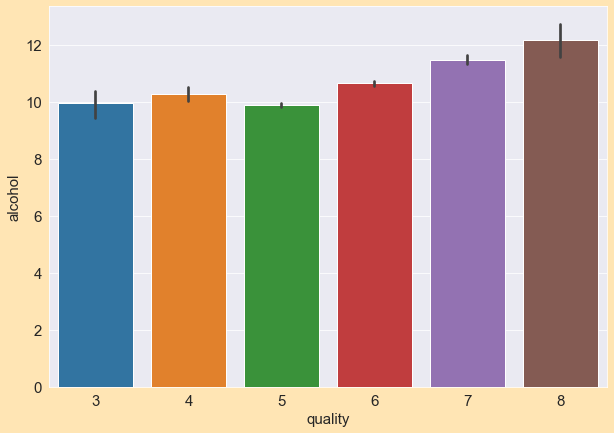

In [26]:
sns.barplot(x='quality',y='alcohol',data=wine_df)
# We can observe higher the alcohol content higher the quality of wine

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

<Figure size 1800x720 with 0 Axes>

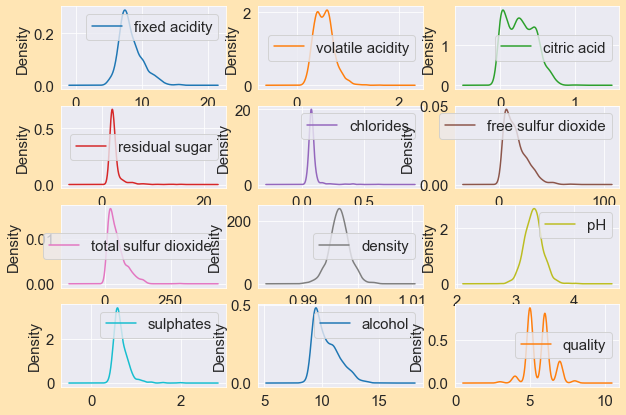

In [27]:
# checking the distribution of the features
plt.figure(figsize=(25,10))
wine_df.plot(kind ='density',subplots = True, layout =(4,3),sharex = False)
# We can Observe there is skewness present in some columns

fixed acidity               AxesSubplot(0.125,0.71587;0.227941x0.16413)
volatile acidity         AxesSubplot(0.398529,0.71587;0.227941x0.16413)
citric acid              AxesSubplot(0.672059,0.71587;0.227941x0.16413)
residual sugar             AxesSubplot(0.125,0.518913;0.227941x0.16413)
chlorides               AxesSubplot(0.398529,0.518913;0.227941x0.16413)
free sulfur dioxide     AxesSubplot(0.672059,0.518913;0.227941x0.16413)
total sulfur dioxide       AxesSubplot(0.125,0.321957;0.227941x0.16413)
density                 AxesSubplot(0.398529,0.321957;0.227941x0.16413)
pH                      AxesSubplot(0.672059,0.321957;0.227941x0.16413)
sulphates                     AxesSubplot(0.125,0.125;0.227941x0.16413)
alcohol                    AxesSubplot(0.398529,0.125;0.227941x0.16413)
quality                    AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

<Figure size 1800x720 with 0 Axes>

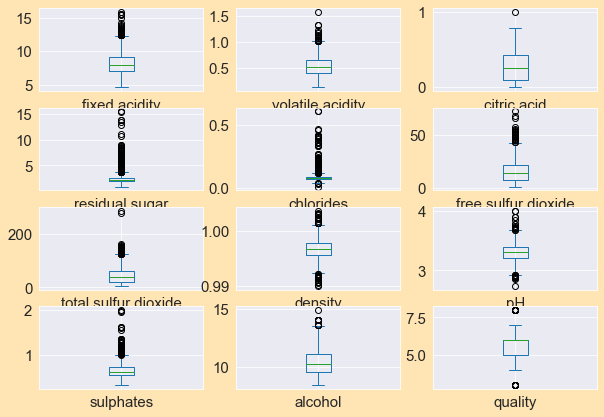

In [28]:
# Plotting a BOX plot to check the outliers
plt.figure(figsize=(25,10))
wine_df.plot(kind ='box',subplots = True, layout =(4,3),sharex = False)
# we can see there are few outliers that we should remove

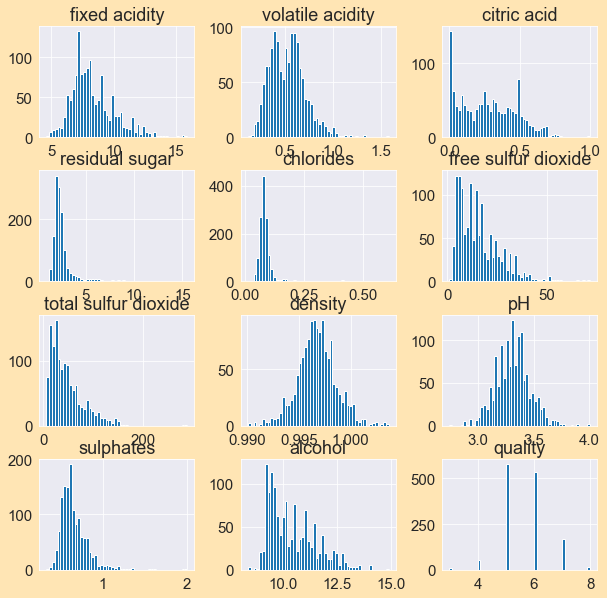

In [29]:
#  Histogram
wine_df.hist(figsize=(10,10),bins=50)
plt.show()

##  Correlation

In [30]:
correlation = wine_df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<AxesSubplot:>

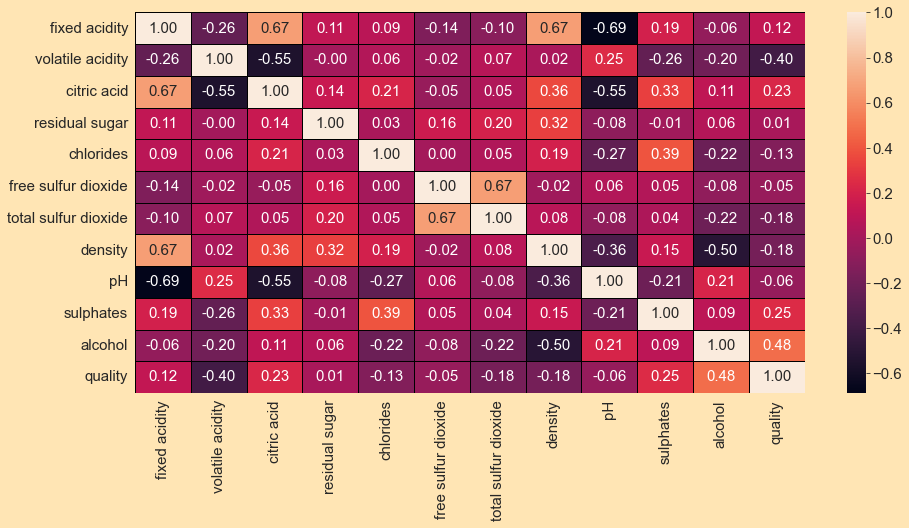

In [31]:
# Creating a heatmap to visualise the relationship
plt.figure(figsize=(15,7))
sns.heatmap(correlation,annot=True,linewidths = 0.5,linecolor='black',fmt='.2f')

##### High Correlated features:- 

Alcohol and Volatile acidity are the most important  physiochemical properties for making a high quality wine
    
##### low Correlated features:-

residual sugar, free sulfur dioxide and pH

In [32]:
correlation['quality'].sort_values()
# We can see residual sugar,pH and freee sulfur dioxide is least correlated with the target quality
# We will drop them

volatile acidity       -0.395214
density                -0.184252
total sulfur dioxide   -0.177855
chlorides              -0.130988
pH                     -0.055245
free sulfur dioxide    -0.050463
residual sugar          0.013640
fixed acidity           0.119024
citric acid             0.228057
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

## Feature Engineering and Selection

In [33]:
# first we are going to drop the least correlated values
wine_df.drop(['residual sugar','free sulfur dioxide','pH'],axis=1,inplace=True)

In [34]:
wine_df.sample()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
858,11.7,0.28,0.47,0.054,32.0,0.99686,0.67,10.6,7


In [35]:
# Splitting the data into features(x) and Target(y)
x = wine_df.iloc[:,:-1]
y = wine_df.iloc[:,-1]

In [36]:
# CHECKING MULTICOLLINEARITY
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF FACTOR'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [38]:
calc_vif(x) 
# We can see density and alcohol has high vif score

,variables,VIF FACTOR
0,fixed acidity,51.043933
1,volatile acidity,15.646613
2,citric acid,8.880709
3,chlorides,6.002677
4,total sulfur dioxide,3.403831
5,density,213.909759
6,sulphates,21.751990
7,alcohol,115.715960


In [40]:
# DROPPING density
wine_df.drop(['density'],axis=1,inplace=True)

In [41]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.58,9.8,6
5,7.4,0.66,0.00,0.075,40.0,0.56,9.4,5


In [42]:
# transforming the target variable into binary form
# assigning 3,4,5 qualities as not good
# And 6,7,8 qualities as Good
wine_df['quality'] = wine_df['quality'].map({3 : 'not good', 4 :'not good', 5: 'not good',
                                      6: 'good', 7: 'good', 8: 'good'})

In [43]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.56,9.4,not good
1,7.8,0.88,0.00,0.098,67.0,0.68,9.8,not good
2,7.8,0.76,0.04,0.092,54.0,0.65,9.8,not good
3,11.2,0.28,0.56,0.075,60.0,0.58,9.8,good
5,7.4,0.66,0.00,0.075,40.0,0.56,9.4,not good


In [44]:
wine_df['quality'].value_counts()


good        719
not good    640
Name: quality, dtype: int64

In [45]:
# Labelling the Data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

wine_df['quality'] = le.fit_transform(wine_df['quality'])

wine_df['quality'].value_counts()

0    719
1    640
Name: quality, dtype: int64

In [46]:
# Before further preprocessing we shall split the data into features(x) and target(y)
x = wine_df.iloc[:,:-1]
y = wine_df.iloc[:,-1]

In [47]:
# Removing Outliers
from scipy.stats import zscore

In [48]:
z = np.abs(zscore(x))

In [49]:
outliers = np.where(z>3)
outliers

(array([  11,   13,   15,   15,   17,   35,   38,   39,   75,   75,   77,
          80,   82,   85,   96,   96,   99,  114,  115,  127,  135,  135,
         135,  150,  150,  159,  176,  202,  202,  211,  214,  226,  226,
         245,  252,  295,  296,  302,  309,  328,  334,  385,  393,  408,
         448,  473,  483,  485,  492,  510,  513,  534,  555,  562,  564,
         565,  565,  582,  582,  592,  597,  599,  626,  627,  632,  652,
         671,  672,  687,  710,  895,  895,  918,  920,  994, 1060, 1073,
        1081, 1082, 1106, 1117, 1123, 1123, 1159, 1162, 1165], dtype=int64),
 array([5, 4, 3, 5, 3, 1, 3, 5, 3, 5, 3, 5, 5, 5, 3, 5, 4, 1, 1, 6, 2, 3,
        5, 3, 5, 3, 1, 3, 5, 3, 0, 3, 5, 3, 3, 5, 5, 0, 4, 0, 0, 0, 3, 6,
        4, 0, 0, 0, 3, 6, 4, 5, 5, 4, 4, 0, 6, 1, 4, 4, 1, 3, 5, 1, 3, 3,
        3, 3, 5, 6, 3, 5, 4, 4, 3, 4, 3, 6, 6, 1, 1, 3, 5, 5, 3, 3],
       dtype=int64))

In [50]:
x_new=x[(z<3).all(axis=1)]

In [51]:
print("shape before and after")
print("shape before: ", x.shape)
print("shape after: ",x_new.shape)
print("Percentage Loss: ", (x.shape[0]-x_new.shape[0])/x.shape[0])


shape before and after
shape before:  (1359, 7)
shape after:  (1285, 7)
Percentage Loss:  0.054451802796173655


In [52]:
# CHECKING SKEWNESS
x_new.skew().sort_values()

citric acid             0.283399
volatile acidity        0.417429
fixed acidity           0.760459
alcohol                 0.761593
sulphates               0.941565
total sulfur dioxide    1.098764
chlorides               2.491284
dtype: float64

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

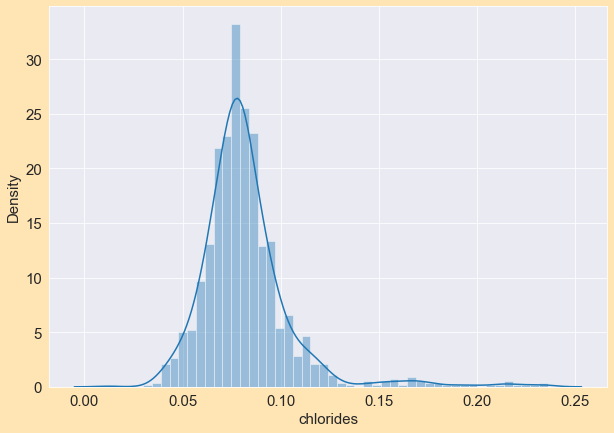

In [53]:
sns.distplot(x_new['chlorides'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

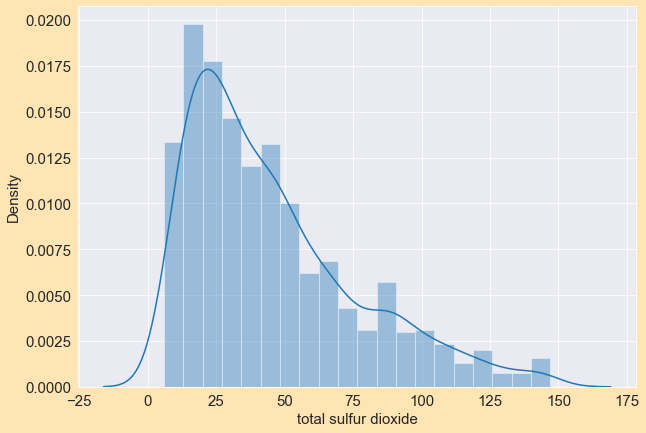

In [54]:
sns.distplot(x_new['total sulfur dioxide'])

In [56]:
# removing the skewness
from sklearn.preprocessing import power_transform

In [57]:
x = power_transform(x,method='yeo-johnson')  

In [58]:
x

array([[-0.43941181,  0.97809056, -1.53054407, ..., -0.12894834,
        -0.582775  , -1.06815695],
       [-0.16147472,  1.72004024, -1.53054407, ...,  0.84179606,
         0.40013025, -0.49928965],
       [-0.16147472,  1.24204696, -1.25696245, ...,  0.53001199,
         0.18837883, -0.49928965],
       ...,
       [-1.73355714,  0.23005041, -0.87129184, ...,  0.44785259,
         0.87848847,  0.87540818],
       [-1.73355714,  0.71944391, -0.74877427, ...,  0.23657542,
         0.59317098, -0.02192819],
       [-1.63197567, -1.31778358,  1.02167696, ...,  0.17029093,
         0.2611718 ,  0.72354386]])

In [59]:
x.ndim 

2

In [60]:
x.mean()

-1.7248942151031087e-13

In [62]:
x.std()

1.0

### LOGISTIC REGRESSION

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [66]:
lr = LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training accuracy score is ', round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing accuracy score is ', round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random state 2 The model performs very well
At random state:- 2
Training accuracy score is  74.3
Testing accuracy score is  74.3 


At random state 91 The model performs very well
At random state:- 91
Training accuracy score is  73.8
Testing accuracy score is  73.8 


At random state 194 The model performs very well
At random state:- 194
Training accuracy score is  74.3
Testing accuracy score is  74.3 


At random state 327 The model performs very well
At random state:- 327
Training accuracy score is  74.0
Testing accuracy score is  74.0 


At random state 457 The model performs very well
At random state:- 457
Training accuracy score is  74.8
Testing accuracy score is  74.8 


At random state 612 The model performs very well
At random state:- 612
Training accuracy score is  74.0
Testing accuracy score is  74.0 


At random state 715 The model performs very well
At random state:- 715
Training accuracy score is  74.3
Testing accuracy score is  74.3 


At random state 823 The model per

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=457)

### logistic regression

In [69]:
lr.fit(x_train,y_train)

LogisticRegression()

In [70]:
pred_train = lr.predict(x_train)

In [71]:
pred_test = lr.predict(x_test)

In [72]:
accuracy_score(y_train,pred_train)

0.7476340694006309

In [73]:
accuracy_score(y_test,pred_test)

0.7475490196078431

In [81]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       212
           1       0.75      0.70      0.73       196

    accuracy                           0.75       408
   macro avg       0.75      0.75      0.75       408
weighted avg       0.75      0.75      0.75       408



In [82]:
confusion_matrix(y_test,pred_test)

array([[167,  45],
       [ 58, 138]], dtype=int64)

### Cross Validation Score

In [75]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)

In [79]:
for j in range(4,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    print(lsscore)
    lsc = lsscore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',lsc*100)
    print('accuracy_score is:- ',lss*100)
    print('\n')
# We can see the cross validation score and the acuracy score is almost the same

[0.73235294 0.7        0.77647059 0.73156342]
At cv:-  4
Cross validation score is:-  73.50967378101683
accuracy_score is:-  74.75490196078431


[0.73529412 0.70955882 0.80147059 0.73161765 0.73062731]
At cv:-  5
Cross validation score is:-  74.171369654873
accuracy_score is:-  74.75490196078431


[0.70484581 0.7753304  0.66960352 0.7920354  0.74336283 0.73451327]
At cv:-  6
Cross validation score is:-  73.66152066845997
accuracy_score is:-  74.75490196078431


[0.68205128 0.77319588 0.65463918 0.85051546 0.74226804 0.75773196
 0.72680412]
At cv:-  7
Cross validation score is:-  74.10294173180772
accuracy_score is:-  74.75490196078431


[0.68235294 0.76470588 0.69411765 0.68823529 0.84705882 0.72941176
 0.75882353 0.71005917]
At cv:-  8
Cross validation score is:-  73.43456317438218
accuracy_score is:-  74.75490196078431


[0.64238411 0.80794702 0.75496689 0.60264901 0.85430464 0.74172185
 0.7615894  0.75496689 0.71523179]
At cv:-  9
Cross validation score is:-  73.73068432671083
accur

### Checking Other Models 

In [83]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

In [89]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 69.36274509803921
[[162  56]
 [ 69 121]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       218
           1       0.68      0.64      0.66       190

    accuracy                           0.69       408
   macro avg       0.69      0.69      0.69       408
weighted avg       0.69      0.69      0.69       408



In [91]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('Accuracy',accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 72.79411764705883
[[155  63]
 [ 48 142]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       218
           1       0.69      0.75      0.72       190

    accuracy                           0.73       408
   macro avg       0.73      0.73      0.73       408
weighted avg       0.73      0.73      0.73       408



In [92]:
# cross validating
from sklearn.model_selection import cross_val_score
rfa = accuracy_score(y_test,predrf)

In [93]:
for j in range(4,10):
    rfscore = cross_val_score(rf,x,y,cv=j)
    print(lsscore)
    rfc = rfscore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',rfc*100)
    print('accuracy_score is:- ',rfa*100)
    print('\n')
# We can see the accuracy is almost same

[0.64238411 0.80794702 0.75496689 0.60264901 0.85430464 0.74172185
 0.7615894  0.75496689 0.71523179]
At cv:-  4
Cross validation score is:-  71.67013708138123
accuracy_score is:-  72.79411764705883


[0.64238411 0.80794702 0.75496689 0.60264901 0.85430464 0.74172185
 0.7615894  0.75496689 0.71523179]
At cv:-  5
Cross validation score is:-  73.43634686346864
accuracy_score is:-  72.79411764705883


[0.64238411 0.80794702 0.75496689 0.60264901 0.85430464 0.74172185
 0.7615894  0.75496689 0.71523179]
At cv:-  6
Cross validation score is:-  71.15999376242641
accuracy_score is:-  72.79411764705883


[0.64238411 0.80794702 0.75496689 0.60264901 0.85430464 0.74172185
 0.7615894  0.75496689 0.71523179]
At cv:-  7
Cross validation score is:-  71.89758694913336
accuracy_score is:-  72.79411764705883


[0.64238411 0.80794702 0.75496689 0.60264901 0.85430464 0.74172185
 0.7615894  0.75496689 0.71523179]
At cv:-  8
Cross validation score is:-  72.91942220675253
accuracy_score is:-  72.794117647058

In [95]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [96]:
svc = SVC()
knc = KNeighborsClassifier()
sgd = SGDClassifier()
adc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

In [97]:
def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_1_pred_train = algorithm_instance.predict(x_train)
    model_1_pred_test = algorithm_instance.predict(x_test)
    print('Accuracy Score of the training model: ',accuracy_score(y_train,model_1_pred_train))
    print('Accuracy Score of the testing model: ',accuracy_score(y_test,model_1_pred_test))
    print('Classification report of the test data \n ',classification_report(y_test,model_1_pred_test))
    print('Classification report of the train data \n ',classification_report(y_train,model_1_pred_train))
    print('Confusion Matrix: \n',confusion_matrix(y_test,model_1_pred_test))

In [98]:
model_selection(svc,x_train,y_train,x_test,y_test)

Accuracy Score of the training model:  0.7917981072555205
Accuracy Score of the testing model:  0.7328431372549019
Classification report of the test data 
                precision    recall  f1-score   support

           0       0.78      0.70      0.74       218
           1       0.69      0.77      0.73       190

    accuracy                           0.73       408
   macro avg       0.73      0.74      0.73       408
weighted avg       0.74      0.73      0.73       408

Classification report of the train data 
                precision    recall  f1-score   support

           0       0.82      0.77      0.80       501
           1       0.76      0.81      0.79       450

    accuracy                           0.79       951
   macro avg       0.79      0.79      0.79       951
weighted avg       0.79      0.79      0.79       951

Confusion Matrix: 
 [[152  66]
 [ 43 147]]


In [107]:
pred_sv = svc.predict(x_test)
svca = accuracy_score(y_test,pred_sv)
for j in range(4,10):
    svccore = cross_val_score(svc,x,y,cv=j)
    print(svccore)
    svcc = svccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',svcc*100)
    print('accuracy_score is:- ',svca*100)
    print('\n') # cv and accuracy is almost same

[0.70882353 0.69705882 0.78529412 0.71976401]
At cv:-  4
Cross validation score is:-  72.77351205969113
accuracy_score is:-  73.2843137254902


[0.72794118 0.70220588 0.79779412 0.75       0.73800738]
At cv:-  5
Cross validation score is:-  74.31897113088779
accuracy_score is:-  73.2843137254902


[0.69603524 0.75330396 0.66079295 0.80088496 0.73893805 0.7300885 ]
At cv:-  6
Cross validation score is:-  73.0007277169181
accuracy_score is:-  73.2843137254902


[0.67179487 0.76804124 0.62886598 0.83505155 0.73195876 0.73195876
 0.72680412]
At cv:-  7
Cross validation score is:-  72.77821834522865
accuracy_score is:-  73.2843137254902


[0.66470588 0.75882353 0.71764706 0.68235294 0.85294118 0.74705882
 0.74705882 0.71597633]
At cv:-  8
Cross validation score is:-  73.5820570831883
accuracy_score is:-  73.2843137254902


[0.64238411 0.81456954 0.75496689 0.54966887 0.87417219 0.7615894
 0.76821192 0.77483444 0.68211921]
At cv:-  9
Cross validation score is:-  73.58351729212657
accuracy_sc

In [102]:
#KNeighborClassifier
model_selection(knc,x_train,y_train,x_test,y_test)

Accuracy Score of the training model:  0.825446898002103
Accuracy Score of the testing model:  0.678921568627451
Classification report of the test data 
                precision    recall  f1-score   support

           0       0.70      0.71      0.70       218
           1       0.66      0.64      0.65       190

    accuracy                           0.68       408
   macro avg       0.68      0.68      0.68       408
weighted avg       0.68      0.68      0.68       408

Classification report of the train data 
                precision    recall  f1-score   support

           0       0.83      0.85      0.84       501
           1       0.83      0.80      0.81       450

    accuracy                           0.83       951
   macro avg       0.83      0.82      0.82       951
weighted avg       0.83      0.83      0.83       951

Confusion Matrix: 
 [[155  63]
 [ 68 122]]


In [103]:
#SgdClassifier
model_selection(sgd,x_train,y_train,x_test,y_test)

Accuracy Score of the training model:  0.7360672975814931
Accuracy Score of the testing model:  0.7009803921568627
Classification report of the test data 
                precision    recall  f1-score   support

           0       0.77      0.63      0.69       218
           1       0.65      0.78      0.71       190

    accuracy                           0.70       408
   macro avg       0.71      0.71      0.70       408
weighted avg       0.71      0.70      0.70       408

Classification report of the train data 
                precision    recall  f1-score   support

           0       0.78      0.69      0.73       501
           1       0.70      0.78      0.74       450

    accuracy                           0.74       951
   macro avg       0.74      0.74      0.74       951
weighted avg       0.74      0.74      0.74       951

Confusion Matrix: 
 [[137  81]
 [ 41 149]]


In [108]:
# cross validation
pred_sgd = sgd.predict(x_test)
sgda = accuracy_score(y_test,pred_sgd)
for j in range(4,10):
    sgdcore = cross_val_score(sgd,x,y,cv=j)
    print(sgdcore)
    sgdcc = sgdcore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',sgdcc*100)
    print('accuracy_score is:- ',sgda*100)
    print('\n') # cv and accuracy is almost same

[0.65294118 0.66470588 0.78823529 0.68436578]
At cv:-  4
Cross validation score is:-  69.75620336630227
accuracy_score is:-  70.09803921568627


[0.71323529 0.6875     0.72058824 0.71691176 0.74538745]
At cv:-  5
Cross validation score is:-  71.67245495984372
accuracy_score is:-  70.09803921568627


[0.60792952 0.67400881 0.63876652 0.77433628 0.69911504 0.69469027]
At cv:-  6
Cross validation score is:-  68.14744064558886
accuracy_score is:-  70.09803921568627


[0.63076923 0.40721649 0.58247423 0.76804124 0.72680412 0.7371134
 0.74226804]
At cv:-  7
Cross validation score is:-  65.63838223632038
accuracy_score is:-  70.09803921568627


[0.64117647 0.73529412 0.67058824 0.64117647 0.85294118 0.75882353
 0.74117647 0.73372781]
At cv:-  8
Cross validation score is:-  72.18630351548903
accuracy_score is:-  70.09803921568627


[0.59602649 0.78807947 0.74172185 0.58940397 0.83443709 0.69536424
 0.77483444 0.68874172 0.67549669]
At cv:-  9
Cross validation score is:-  70.93451066961002
accu

In [106]:
#AdaBoostClassifier
model_selection(adc,x_train,y_train,x_test,y_test)

Accuracy Score of the training model:  0.7991587802313355
Accuracy Score of the testing model:  0.696078431372549
Classification report of the test data 
                precision    recall  f1-score   support

           0       0.72      0.72      0.72       218
           1       0.67      0.67      0.67       190

    accuracy                           0.70       408
   macro avg       0.69      0.69      0.69       408
weighted avg       0.70      0.70      0.70       408

Classification report of the train data 
                precision    recall  f1-score   support

           0       0.80      0.82      0.81       501
           1       0.79      0.78      0.79       450

    accuracy                           0.80       951
   macro avg       0.80      0.80      0.80       951
weighted avg       0.80      0.80      0.80       951

Confusion Matrix: 
 [[156  62]
 [ 62 128]]


In [109]:
# Cross Validation
pred_adc = adc.predict(x_test)
adca = accuracy_score(y_test,pred_adc)
for j in range(4,10):
    adccore = cross_val_score(adc,x,y,cv=j)
    print(adccore)
    adcc = adccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',adcc*100)
    print('accuracy_score is:- ',adca*100)
    print('\n') # cv and accuracy is almost same

[0.67647059 0.68529412 0.77058824 0.71386431]
At cv:-  4
Cross validation score is:-  71.15543119902829
accuracy_score is:-  69.6078431372549


[0.66911765 0.69852941 0.78676471 0.73529412 0.71586716]
At cv:-  5
Cross validation score is:-  72.11146082049056
accuracy_score is:-  69.6078431372549


[0.63876652 0.74449339 0.63436123 0.75663717 0.73893805 0.66371681]
At cv:-  6
Cross validation score is:-  69.61521967954467
accuracy_score is:-  69.6078431372549


[0.65128205 0.71649485 0.65979381 0.79896907 0.74226804 0.75257732
 0.65979381]
At cv:-  7
Cross validation score is:-  71.15969940712209
accuracy_score is:-  69.6078431372549


[0.64117647 0.74117647 0.68235294 0.68235294 0.82352941 0.71764706
 0.75882353 0.67455621]
At cv:-  8
Cross validation score is:-  71.52018795683955
accuracy_score is:-  69.6078431372549


[0.57615894 0.78807947 0.74834437 0.60927152 0.84768212 0.70860927
 0.72847682 0.79470199 0.65562914]
At cv:-  9
Cross validation score is:-  71.74392935982338
accuracy

In [110]:
#GradientBosstingClassifier
model_selection(gbc,x_train,y_train,x_test,y_test)

Accuracy Score of the training model:  0.8706624605678234
Accuracy Score of the testing model:  0.7181372549019608
Classification report of the test data 
                precision    recall  f1-score   support

           0       0.76      0.70      0.73       218
           1       0.68      0.74      0.71       190

    accuracy                           0.72       408
   macro avg       0.72      0.72      0.72       408
weighted avg       0.72      0.72      0.72       408

Classification report of the train data 
                precision    recall  f1-score   support

           0       0.88      0.88      0.88       501
           1       0.86      0.86      0.86       450

    accuracy                           0.87       951
   macro avg       0.87      0.87      0.87       951
weighted avg       0.87      0.87      0.87       951

Confusion Matrix: 
 [[152  66]
 [ 49 141]]


In [111]:
# cross val 
pred_gbc = gbc.predict(x_test)
gbca = accuracy_score(y_test,pred_gbc)
for j in range(4,10):
    gbccore = cross_val_score(gbc,x,y,cv=j)
    print(gbccore)
    gbcc = adccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',gbcc*100)
    print('accuracy_score is:- ',gbca*100)
    print('\n') # cv and accuracy is almost same

[0.68235294 0.68529412 0.74411765 0.71091445]
At cv:-  4
Cross validation score is:-  71.74392935982338
accuracy_score is:-  71.81372549019608


[0.6875     0.70955882 0.77573529 0.71691176 0.7195572 ]
At cv:-  5
Cross validation score is:-  71.74392935982338
accuracy_score is:-  71.81372549019608


[0.66079295 0.74889868 0.65198238 0.75663717 0.73451327 0.7079646 ]
At cv:-  6
Cross validation score is:-  71.74392935982338
accuracy_score is:-  71.81372549019608


[0.63589744 0.76804124 0.6443299  0.81443299 0.70103093 0.7628866
 0.69587629]
At cv:-  7
Cross validation score is:-  71.74392935982338
accuracy_score is:-  71.81372549019608


[0.62941176 0.74117647 0.7        0.69411765 0.82352941 0.74117647
 0.76470588 0.70414201]
At cv:-  8
Cross validation score is:-  71.74392935982338
accuracy_score is:-  71.81372549019608


[0.60927152 0.78145695 0.70860927 0.58278146 0.84768212 0.7615894
 0.72847682 0.78145695 0.67549669]
At cv:-  9
Cross validation score is:-  71.74392935982338
accur

## AUC ROC Curve

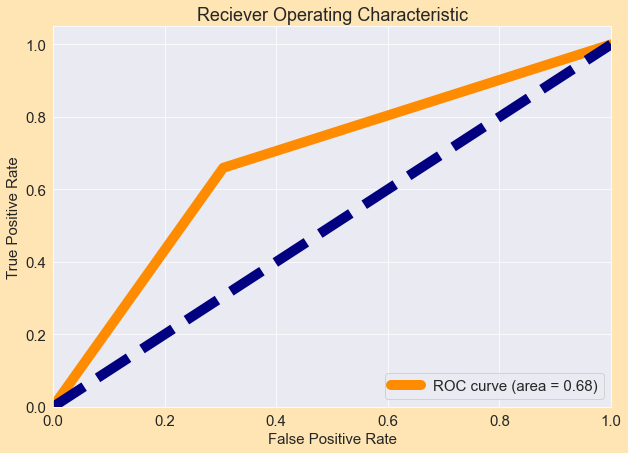

In [112]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color = 'darkorange',lw=10,label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color = 'navy',lw = 10, linestyle = '--')
plt.xlim([0.0,1.0]) # limitation
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic')
plt.legend(loc='lower right') # To display ROC curve (area = 0.69) at the lower right
plt.show()

### Importing the best model

In [113]:
# support vector classifier is giving more accuracy 73%
import pickle
filename = 'wine_quality.pkl'
pickle.dump(svc,open(filename, 'wb'))